## Exploring EY Wildfires Dataset for Wildfires recorded in Alberta between 2006 and 2021
This notebook is using python to try to identify most affected FSA regions and the reasons that are causing these wildfires, especially large sized fires with bigger impact on residents and environment

In [1]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


In [2]:
#load data
df = pd.read_csv('./fp-historical-wildfire-data-2006-2021.csv')

In [3]:
#add new column for forest area
locationMap = {'C': 'Calgary', 
               'E': 'Edson', 
               'H': 'High Level', 
                'G': 'Grande Prairie',
                'L': 'Lac La Biche',
                'M': 'Fort McMurray',
                'P': 'Peace River',
                'R': 'Rocky',
                'S': 'Slave Lke',
                'W': 'Whitecourt' 
}
df['forest_area'] = df['fire_number'].str[0].map(locationMap)

In [12]:
#total are burnt in each location
total_area_burnt = df.groupby('forest_area')['current_size'].sum()
total_area_burnt = total_area_burnt.sort_values(ascending=False)
#bar chart 
total_area_burnt

forest_area
Fort McMurray     1639945.87
High Level        1100471.38
Slave Lke          534971.31
Peace River         98087.78
Lac La Biche        94517.23
Edson               41886.90
Rocky               18166.32
Whitecourt          12619.99
Grande Prairie       7363.50
Calgary              5030.14
Name: current_size, dtype: float64

## Most Vulnerable Regions in Alberta

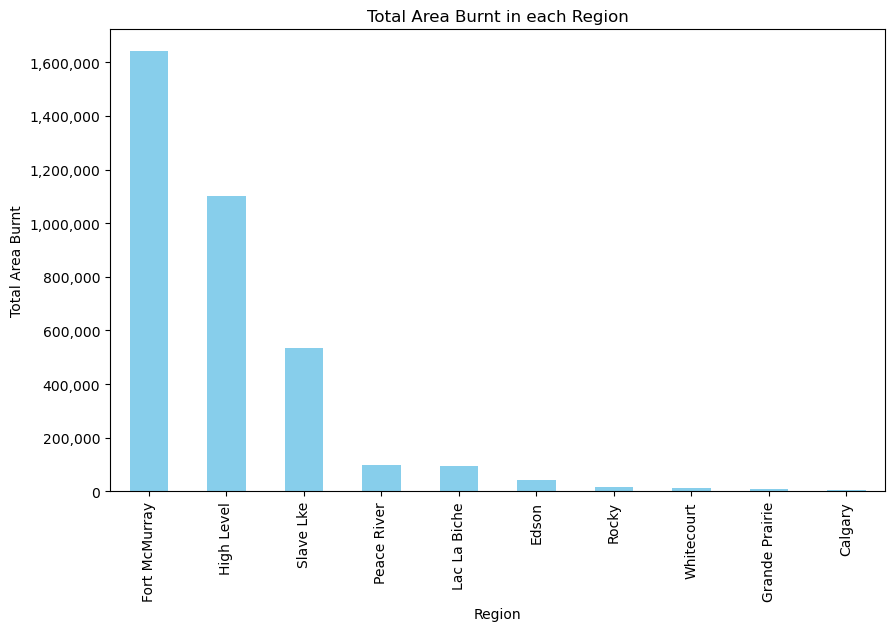

In [37]:
import matplotlib.ticker as ticker
#plot for total area burnt in each region
fig, ax = plt.subplots()
total_area_burnt.plot(kind='bar', ax=ax, color='skyblue')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
plt.title('Total Area Burnt in each Region')
plt.xlabel('Region')
plt.ylabel('Total Area Burnt')
#make plot wider
fig.set_size_inches(10, 6)

plt.show()

## Correlation matrix between all numeric values in Most vulnerable regions

Text(0.5, 1.0, 'Correlation Matrix for Fort McMurray')

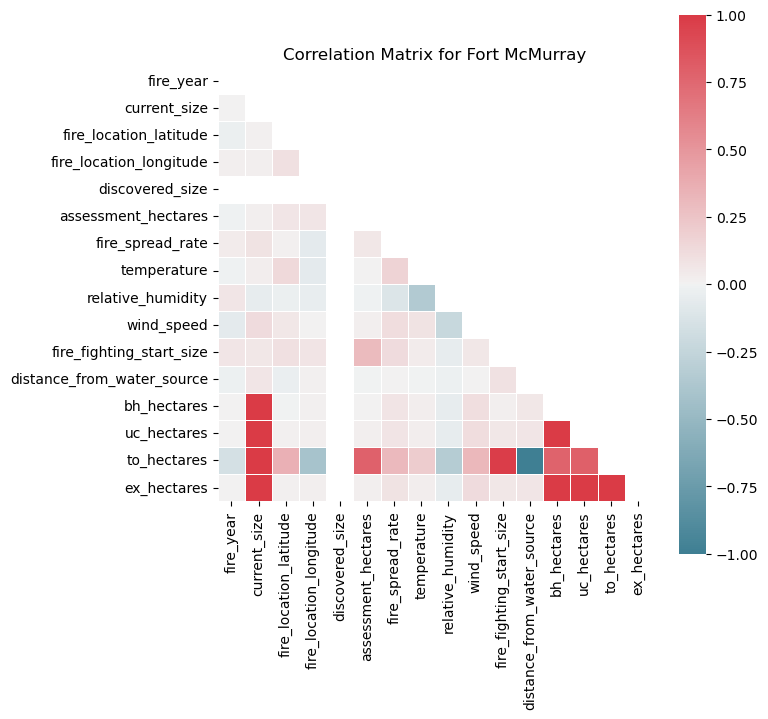

In [44]:
McMurray = df[df['forest_area'] == 'Fort McMurray']
McMurray_numerical = McMurray.select_dtypes(include=['int64', 'float64','int32','float32'])
corr = McMurray_numerical.corr()
f, ax = plt.subplots(figsize=(7, 7))
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, mask=mask, cmap=sns.diverging_palette(220, 10, as_cmap=True), square=True, ax=ax, vmin = -1.0, vmax = 1.0, linewidths=.5)
plt.title('Correlation Matrix for Fort McMurray')

Text(0.5, 1.0, 'Correlation Matrix for High Level')

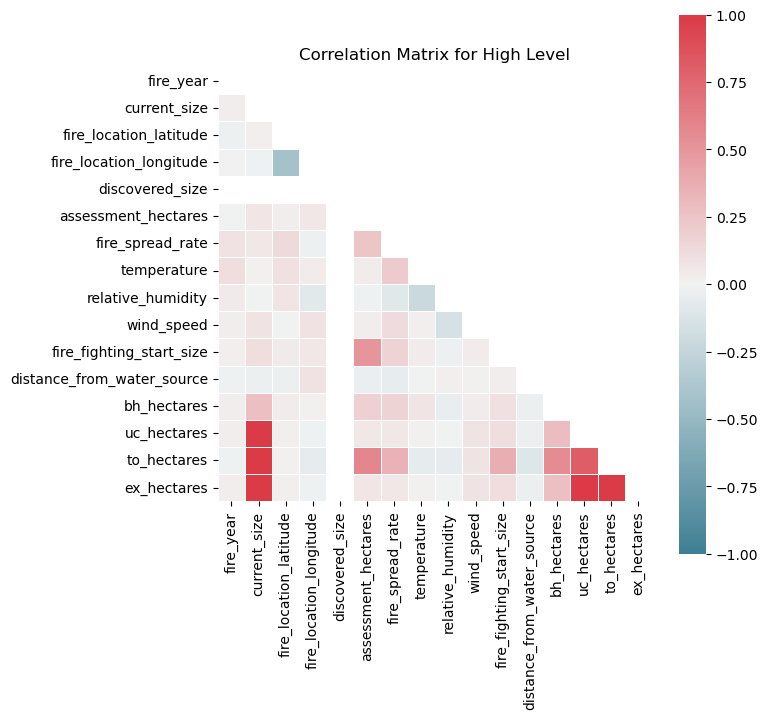

In [45]:
HighLevel = df[df['forest_area'] == 'High Level']
HighLevel_numerical = HighLevel.select_dtypes(include=['int64', 'float64','int32','float32'])
hlcorr = HighLevel_numerical.corr()
f, ax = plt.subplots(figsize=(7, 7))
mask = np.zeros_like(hlcorr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(hlcorr, mask=mask, cmap=sns.diverging_palette(220, 10, as_cmap=True), square=True, ax=ax, vmin = -1.0, vmax = 1.0, linewidths=.5)
plt.title('Correlation Matrix for High Level')

Text(0.5, 1.0, 'Correlation Matrix for Slave Lake')

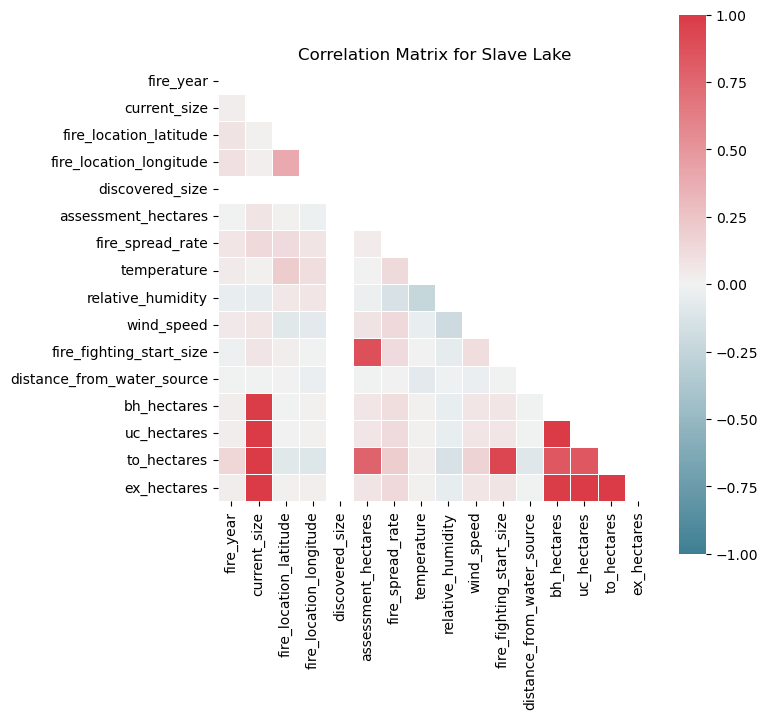

In [46]:
SlaveLake = df[df['forest_area'] == 'Slave Lke']
SlaveLake_numerical = SlaveLake.select_dtypes(include=['int64', 'float64','int32','float32'])
slcorr = SlaveLake_numerical.corr()
f, ax = plt.subplots(figsize=(7, 7))
mask = np.zeros_like(slcorr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(slcorr, mask=mask, cmap=sns.diverging_palette(220, 10, as_cmap=True), square=True, ax=ax, vmin = -1.0, vmax = 1.0, linewidths=.5)
plt.title('Correlation Matrix for Slave Lake')

## Reason for large fires in each area

In [70]:
#pie chart for the causes of fire in fort mcmurray more than 20 hectares
HighLevelcause = McMurray[McMurray['current_size'] >= 20]
HighLevelcause = McMurray_cause['general_cause_desc'].value_counts()


general_cause_desc
Lightning              171
Undetermined             6
Government               1
Under Investigation      1
Incendiary               1
Oil & Gas Industry       1
Railroad                 1
Other Industry           1
Restart                  1
Name: count, dtype: int64

Text(0.5, 1.0, 'Causes of Fire in Fort McMurray more than 20 hectares')

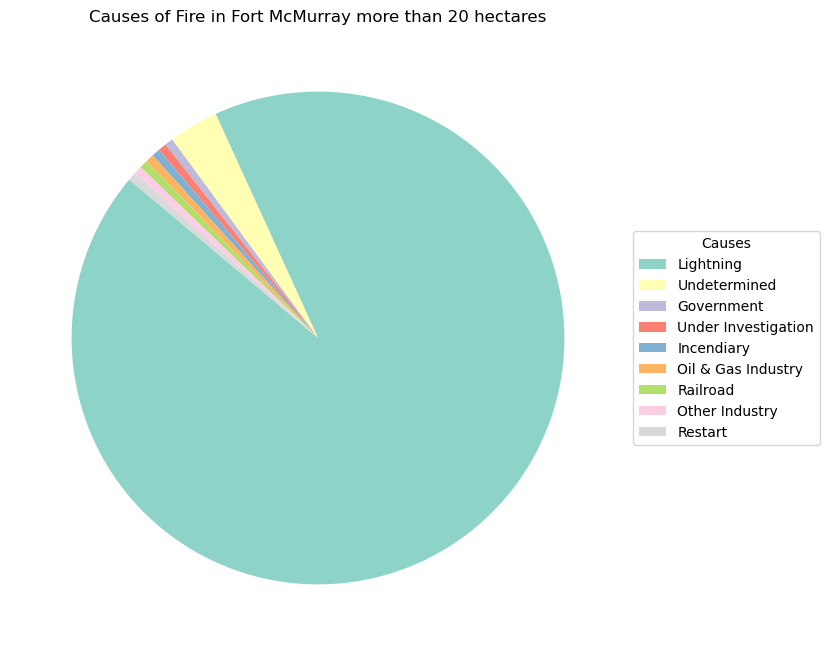

In [75]:
plt.figure(figsize=(12, 8))
colors = plt.cm.Set3.colors  # color scheme
patches  = plt.pie(
    McMurray_cause,
    labels=None,  # No labels
    startangle=140,
    colors=colors,
)
## Add legend with labels and percentages
plt.legend(
    title="Causes",
    labels=McMurray_cause.index,
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1),
)
plt.title("Causes of Fire in Fort McMurray more than 20 hectares")

Text(0.5, 1.0, 'Causes of Fire in High Level more than 20 hectares')

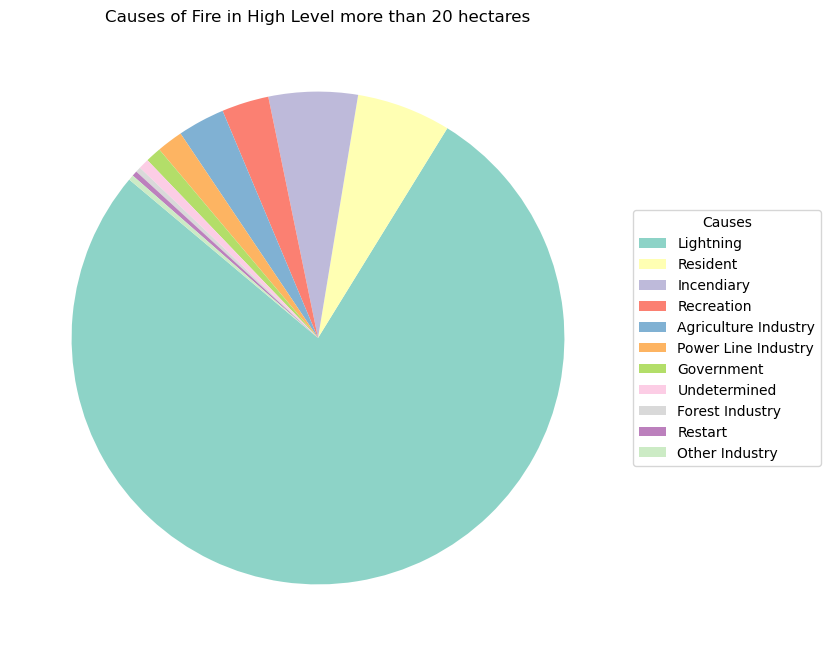

In [77]:
#pie chart for the causes of fire in fort mcmurray more than 20 hectares
HighLevelcause = HighLevel[HighLevel['current_size'] >= 20]
HighLevelcause = HighLevelcause['general_cause_desc'].value_counts()
plt.figure(figsize=(12, 8))
colors = plt.cm.Set3.colors  # color scheme
patches  = plt.pie(
    HighLevelcause,
    labels=None,  # No labels
    startangle=140,
    colors=colors,
)
## Add legend with labels and percentages
plt.legend(
    title="Causes",
    labels=HighLevelcause.index,
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1),
)
plt.title("Causes of Fire in High Level more than 20 hectares")

In [78]:
#pie chart for the causes of fire in fort mcmurray more than 20 hectares
SlaveLakecause = SlaveLake[SlaveLake['current_size'] >= 20]
SlaveLakecause = SlaveLakecause['general_cause_desc'].value_counts()
plt.figure(figsize=(12, 8))
colors = plt.cm.Set3.colors  # color scheme
patches  = plt.pie(
    SlaveLakecause,
    labels=None,  # No labels
    startangle=140,
    colors=colors,
)
## Add legend with labels and percentages
plt.legend(
    title="Causes",
    labels=SlaveLakecause.index,
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1),
)
plt.title("Causes of Fire in Slave Lake
          more than 20 hectares")

KeyboardInterrupt: 